# Confidence Interval for Municipality Unemployment Correlation


Co-authored via Live Share between Jasiel Rivera and Sergio Mattei.

In [1]:
import pandas as pd
from datetime import datetime

START_DATE = datetime(2010, 1, 1)
END_DATE = datetime(2019, 12, 31)

## Cleaning and Importing

In [2]:
merged_df = pd.read_csv(
    "../data/clean/Delitos y Desempleos/delitos_desempleos_merged_(deltas_mensuales).csv"
)

# Cast all items to Python datetime.
merged_df["Date"] = pd.to_datetime(
    merged_df["Date"], format="%Y-%m-%d", errors="coerce"
)

# We're only interested in the rows between START_DATE and END_DATE.
merged_df = merged_df.loc[
    (merged_df["Date"] > START_DATE) & (merged_df["Date"] <= END_DATE)
]
merged_df

Distrito  Tipo I  Ases.  Viol.  Robo  Agr. Grave  Esc.  Apr. I  \
78           Ponce   243.0    4.0    0.0  26.0        14.0  52.0   123.0   
79        Peñuelas    12.0    0.0    0.0   2.0         0.0   6.0     2.0   
80        Patillas    13.0    0.0    0.0   0.0         4.0   6.0     3.0   
81        Orocovis    22.0    0.0    0.0   0.0         0.0  10.0    12.0   
82       Naranjito    38.0    1.0    0.0   2.0         2.0  14.0    12.0   
...            ...     ...    ...    ...   ...         ...   ...     ...   
9355        Dorado    54.0    2.0    0.0   4.0         3.0  11.0    31.0   
9356       Culebra     4.0    0.0    0.0   0.0         1.0   0.0     3.0   
9357      Guaynabo    92.0    0.0    0.0   6.0         7.0  12.0    52.0   
9358      Aibonito    13.0    1.0    0.0   1.0         3.0   3.0     3.0   
9359  Aguas Buenas     6.0    0.0    0.0   1.0         0.0   4.0     1.0   

      H. Auto       Date  Tasa de Desempleo  Num. Personas Desempleadas  \
78       24.0 2010-02-01               13.5                      9177.0   
79        2.0 2010-02-01               17.9                      1765.0   
80        0.0 2010-02-01               22.5                      1632.0   
81        0.0 2010-02-01               21.4                      1223.0   
82        7.0 2010-02-01               15.7                      1534.0   
...       ...        ...                ...                         ...   
9355      3.0 2019-12-01                6.6                       814.0   
9356      0.0 2019-12-01                3.5                        34.0   
9357     15.0 2019-12-01                4.8                      1669.0   
9358      2.0 2019-12-01               10.8                       696.0   
9359      0.0 2019-12-01               10.0                       614.0   

      Num. Personas Empleadas  Num. Personas Grupo Trabajador  
78                    52355.0                         55635.0  
79                     7276.0                          7503.0  
80                     4634.0                          6086.0  
81                     4161.0                          6002.0  
82                     6789.0                          8169.0  
...                       ...                             ...  
9355                  11992.0                         12591.0  
9356                    829.0                           878.0  
9357                  34546.0                         35754.0  
9358                   5700.0                          6238.0  
9359                   5774.0                          6261.0  

[9282 rows x 14 columns]

## Statistical Analysis
We define a function that calculates the Pearson correlation coefficient, p-value, and confidence interval for a given dataset. The function iterates over municipality names, calculates the Pearson correlation between the unemployment rate and criminality data, and stores the results in a pandas DataFrame. 

- Our null hypothesis here is: The correlation is not significantly different from zero. There is no significant correlation between the unemployment rate and type 1 offences in each municipality.

- Alternate Hypothesis: The correlation is significantly different from zero. There is a significant correlation between unemployment rate and type 1 offences in each municipality.

In [12]:
from scipy.stats import pearsonr


def get_pearson_values(df, alternative="two-sided", significance_level=0.05):
    """
    Gets the Pearson values for each municipality.
    """
    
    confidence_level = significance_level - 1
    pearson_values = []
    for munic_name in df["Distrito"].unique():
        # Get all the rows for this municipality
        munic_df = df.loc[df["Distrito"] == munic_name]
        pearson = pearsonr(
            munic_df["Tasa de Desempleo"], munic_df["Tipo I"], alternative=alternative
        )
        # Append a tuple of values to the running total.
        pearson_values.append(
            (
                munic_name,
                pearson.pvalue,
                pearson.statistic,
                pearson.confidence_interval(confidence_level),
            )
        )
    pearson_df = pd.DataFrame(
        pearson_values,
        columns=["Municipality", "P-Value", "Statistic", "Confidence Interval"],
    )
    # Interpret values.
    # True means we reject the null hypothesis
    pearson_df["Significance"] = pearson_df["P-Value"] < significance_level
    pearson_df["Relationship"] = pearson_df["P-Value"].apply(
        lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "None"
    )
    return pearson_df


# Get the two-sided test, then the test for greater values.
two_sided_results = get_pearson_values(merged_df)
greater_results = get_pearson_values(merged_df, alternative="greater")
display(two_sided_results, greater_results)

Municipality       P-Value  Statistic  \
0         Ponce  4.525796e-16   0.657573   
1      Peñuelas  3.465755e-08   0.479414   
2      Patillas  2.501991e-12   0.586136   
3      Orocovis  6.322036e-11   0.554015   
4     Naranjito  2.707340e-11   0.562791   
..          ...           ...        ...   
73      Culebra  2.957429e-02   0.199546   
74      Corozal  5.441080e-17   0.672595   
75      Comerío  2.585997e-19   0.706982   
76      Guayama  4.469223e-19   0.703678   
77        Coamo  1.270444e-13   0.612947   

                           Confidence Interval  Significance Relationship  
0     (0.7489254518917506, 0.5416920901366944)          True     Positive  
1      (0.607027400869284, 0.3276957369365417)          True     Positive  
2     (0.6930170376639548, 0.4540429340617318)          True     Positive  
3     (0.6674523938313419, 0.4154485071789582)          True     Positive  
4    (0.6744633669281626, 0.42594329964241096)          True     Positive  
..                                         ...           ...          ...  
73  (0.3663821517851498, 0.020278920140212008)          True     Positive  
74    (0.7605192367295419, 0.5604501983624279)          True     Positive  
75    (0.7868483979180296, 0.6038256413759966)          True     Positive  
76    (0.7843313032416162, 0.5996315125121657)          True     Positive  
77   (0.7141520740747813, 0.48664193185681315)          True     Positive  

[78 rows x 6 columns]

Municipality       P-Value  Statistic Confidence Interval  Significance  \
0         Ponce  2.262898e-16   0.657573          (nan, 1.0)          True   
1      Peñuelas  1.732878e-08   0.479414          (nan, 1.0)          True   
2      Patillas  1.250996e-12   0.586136          (nan, 1.0)          True   
3      Orocovis  3.161018e-11   0.554015          (nan, 1.0)          True   
4     Naranjito  1.353670e-11   0.562791          (nan, 1.0)          True   
..          ...           ...        ...                 ...           ...   
73      Culebra  1.478714e-02   0.199546          (nan, 1.0)          True   
74      Corozal  2.720540e-17   0.672595          (nan, 1.0)          True   
75      Comerío  1.292998e-19   0.706982          (nan, 1.0)          True   
76      Guayama  2.234611e-19   0.703678          (nan, 1.0)          True   
77        Coamo  6.352219e-14   0.612947          (nan, 1.0)          True   

   Relationship  
0      Positive  
1      Positive  
2      Positive  
3      Positive  
4      Positive  
..          ...  
73     Positive  
74     Positive  
75     Positive  
76     Positive  
77     Positive  

[78 rows x 6 columns]

## Visualizations

In [13]:
import plotly.express as px
import json

with open("./matteing/municipalities.geojson", "r") as f:
    geojson = json.load(f)

A plot of the strength of the Pearson correlation coefficient across every municipality.

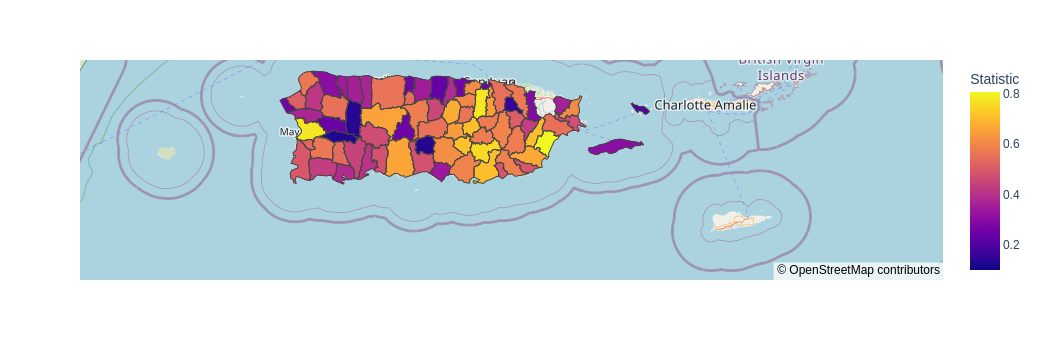

In [14]:
px.choropleth_mapbox(
    two_sided_results,
    mapbox_style="open-street-map",
    geojson=geojson,
    locations="Municipality",
    featureidkey="properties.NAME",
    color="Statistic",
    center=dict(lat=18.0, lon=-66),
    zoom=7,
).show()

A plot of, in binary value, whether statistical significance was found due to the null hypotheses being invalidated.

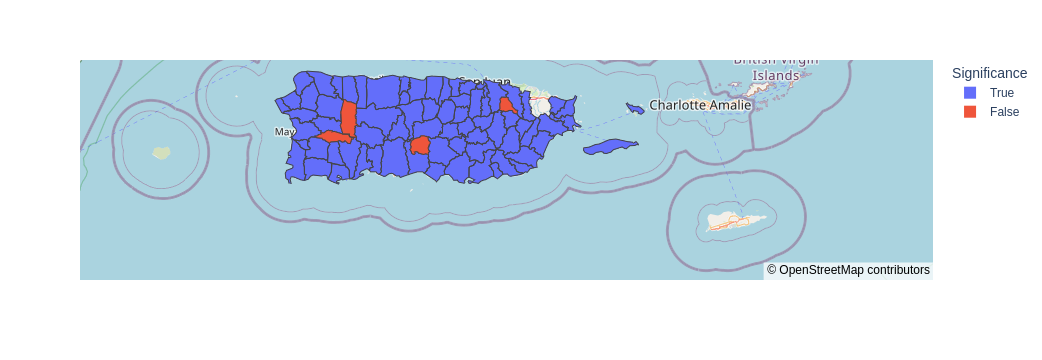

In [15]:
px.choropleth_mapbox(
    two_sided_results,
    mapbox_style="open-street-map",
    geojson=geojson,
    locations="Municipality",
    featureidkey="properties.NAME",
    color="Significance",
    center=dict(lat=18.0, lon=-66),
    zoom=7,
).show()

##### These results suggest that for the majority of municipalities, the null hypothesis can be rejected. This suggests that there is a significant correlation between unemployment rate and type 1 offences for each municipality.